In [1]:
import numpy as np
import pandas as pd

In [ ]:
Pandas
1. Convert the list of 26 letters of the alphabet to the index of the Dataframe, and assign 26 random integer numbers. 
Print out the first 5 rows. [3 points]

In [2]:
data = pd.Series([np.random.randint(0,100) for i in range(26)], index=[chr(i) for i in range(97,123)]);
print(data[:5])

a    53
b    55
c     1
d    81
e    58
dtype: int64


In [ ]:
2. Construct the following DataFrame and print it out. Use "iloc" to convert the first column of this DataFrame as a Series. [3 points]

In [3]:
data = pd.DataFrame(np.array([1,4,7,2,5,5,3,6,8,4,9,12,7,5,1,11,0,11]).reshape(6,3),
             columns=['class1', 'class2','class3'],
             index=[i for i in range(6)]);
print(data);
first_column = data.iloc[:,0];
print(first_column);
print(type(first_column));

   class1  class2  class3
0       1       4       7
1       2       5       5
2       3       6       8
3       4       9      12
4       7       5       1
5      11       0      11
0     1
1     2
2     3
3     4
4     7
5    11
Name: class1, dtype: int32
<class 'pandas.core.series.Series'>


In [ ]:
3. Work on the above data (question 2), implement the following tasks using indexers loc and/or iloc:   [total 6 points]

In [ ]:
(1) Select all columns, except one given column 'class3', and print out the result.

In [4]:
selected_columns1 = data.loc[:,data.columns != 'class3'];
print(selected_columns1);

   class1  class2
0       1       4
1       2       5
2       3       6
3       4       9
4       7       5
5      11       0


In [ ]:
(2) Remove first 3 rows of the DataFrame and print it out.

In [5]:
selected_rows1 = data.iloc[:3,:];
print(selected_rows1);

   class1  class2  class3
0       1       4       7
1       2       5       5
2       3       6       8


In [ ]:
(3) Remove last 3 rows of the DataFrame and print it out.

In [6]:
selected_rows2 = data.iloc[3:,:];
print(selected_rows2);

   class1  class2  class3
3       4       9      12
4       7       5       1
5      11       0      11


In [ ]:
4. Two series: [total 6 points]
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

In [ ]:
(1) From ser1 remove items present in ser2.

In [7]:
ser1 = pd.Series([1, 2, 3, 4, 5]);
ser2 = pd.Series([4, 5, 6, 7, 8]);
result = ser1[~ser1.isin(ser2)];
print(result);

0    1
1    2
2    3
dtype: int64


In [ ]:
(2) Get all items of ser1 and ser2 not common to both.

In [8]:
result1 = ser1[~ser1.isin(ser2)];
result2 = ser2[~ser2.isin(ser1)];
result3 = pd.concat([result1,result2]);
print(result3);

0    1
1    2
2    3
2    6
3    7
4    8
dtype: int64


In [ ]:
5. Compute the Euclidean distance between two series (points) p1 and p2:  [total 4 points]

In [9]:
p1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);
p2 = pd.Series([8, 9, 10, 11, 12, 7, 6, 5, 4, 3]);
dist = np.sqrt(np.sum([(a-b) * (a-b) for a, b in zip(p1, p2)]));
print("Euclidean distance between two series p1 and p2:", dist);

Euclidean distance between two series p1 and p2: 18.16590212458495


In [ ]:
6. Create a new column such that, each row contains the row number of the farthest row-record by Euclidean distance. [8 points]
Input dataset is required: 
1) using numpy random number generator to generate 40 numbers ranged from 1 to 100 using the seed number 42.
2) the index is a,b,c,d,e,f,g,h,i,j, and the column name is p, q, r, s.

In [10]:
np.random.seed(42);
df = pd.DataFrame(np.array([np.random.randint(1,101) for i in range(40)]).reshape(10,4),
             columns=['p','q','r','s'],
             index=[chr(i) for i in range(97,107)]);
print(df);
farthest = [];
distance = [];
for i, row in df.iterrows():
    res = df.drop(i)
    curr = row
    dists = {} 
    for j, k in res.iterrows():
        dists.update({j: round(np.linalg.norm(curr.values - k.values))})
    farthest.append(max(dists, key=dists.get))
    distance.append(max(dists.values()))

df['farthest_row'] = farthest
df['dist'] = distance

df

    p   q   r    s
a  52  93  15   72
b  61  21  83   87
c  75  75  88  100
d  24   3  22   53
e   2  88  30   38
f   2  64  60   21
g  33  76  58   22
h  89  49  91   59
i  42  92  60   80
j  15  62  62   47


,p,q,r,s,farthest_row,dist
a,52,93,15,72,b,101
b,61,21,83,87,e,115
c,75,75,88,100,d,120
d,24,3,22,53,c,120
e,2,88,30,38,b,115
f,2,64,60,21,c,112
g,33,76,58,22,c,94
h,89,49,91,59,e,115
i,42,92,60,80,d,102
j,15,62,62,47,c,85


In [ ]:
7. Create a Dataframe with rows as strides from a given series: L = pd.Series(range(15)) 

In [11]:
L = pd.Series(range(15));
def create_df(data, strides, num_cols):
    num_strides = (data.size - num_cols) // strides;
    temp = np.arange(0, data.size, strides)[:(num_strides + 1)];
    result = np.array([data[i : (i + num_cols)] for i in temp]);
    return result;

result_final = create_df(L,2,4);
result_final

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]], dtype=int64)

In [ ]:
8. Create a DataFrame ‘df’ as below [2 points]. Then, complete the following works: 
    (1) interchange columns 'a' and 'c' [2 points]. 
    (2) Create a generic function to interchange two columns [2 points]. 
    (3) Sort the columns in reverse alphabetical order, that is column 'e' first through column 'a' last. [2 points]      
    [total 8 points]

In [ ]:
(1) interchange columns 'a' and 'c' [2 points]. 

In [12]:
df = pd.DataFrame(np.array([i for i in range(20)]).reshape(4,5),
             columns=[chr(i) for i in range(97,102)],
             index=[i for i in range(4)]);
cols = df.columns.tolist();
num1 = df.columns.get_loc('a');
num2 = df.columns.get_loc('c');
cols[num1], cols[num2] = cols[num2], cols[num1];
df = df[cols];
df

,c,b,a,d,e
0,2,1,0,3,4
1,7,6,5,8,9
2,12,11,10,13,14
3,17,16,15,18,19


In [ ]:
(2) Create a generic function to interchange two columns [2 points]. 

In [13]:
df = pd.DataFrame(np.array([i for i in range(20)]).reshape(4,5),
             columns=[chr(i) for i in range(97,102)],
             index=[i for i in range(4)]);
def interchange_cols(df, col1, col2):
    cols = df.columns.tolist();
    cols[df.columns.get_loc(col1)], cols[df.columns.get_loc(col2)] = cols[df.columns.get_loc(col2)], cols[df.columns.get_loc(col1)];
    df = df[cols];
    return df;
interchange_cols(df, 'a', 'c')

,c,b,a,d,e
0,2,1,0,3,4
1,7,6,5,8,9
2,12,11,10,13,14
3,17,16,15,18,19


In [ ]:
(3) Sort the columns in reverse alphabetical order, that is column 'e' first through column 'a' last. [2 points]      

In [14]:
df = pd.DataFrame(np.array([i for i in range(20)]).reshape(4,5),
             columns=[chr(i) for i in range(97,102)],
             index=[i for i in range(4)]);
df[df.columns[::-1]]

,e,d,c,b,a
0,4,3,2,1,0
1,9,8,7,6,5
2,14,13,12,11,10
3,19,18,17,16,15


In [ ]:
9. Import every 50th row of BostonHousing dataset as a dataframe.    [6 points]

In [15]:
df = pd.read_csv('C:\\Users\\dellpc\\Desktop\\BostonHousing.csv', chunksize=50);
df2 = pd.concat([chunk.iloc[0] for chunk in df],axis = 1);
df2 = df2.transpose();
df2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07,24.8
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98,22.9
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,13.4


In [ ]:
10. Import the boston housing dataset, but while importing change the 'medv' (median house value) column 
so that values < 25 becomes ‘Low’ and > 25 becomes ‘High’.    [4 points]

In [16]:
df = pd.read_csv('C:\\Users\\dellpc\\Desktop\\BostonHousing.csv',converters={'medv':lambda x: 'Low' if float(x)<25 else 'High'});
df2 = df[:51];
df2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,Low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,Low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,High
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,High
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,Low
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,High
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,Low
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,Low


In [ ]:
11. Create a TimeSeries starting ‘2021-01-01’ and 10 weekends (Saturdays) after that having random numbers as values.

In [17]:
result = pd.Series(np.random.randint(1,100,10), index = pd.date_range('2021-01-01', periods=10, freq='W-SAT'))
result

2021-01-02    62
2021-01-09    51
2021-01-16    55
2021-01-23    64
2021-01-30     3
2021-02-06    51
2021-02-13     7
2021-02-20    21
2021-02-27    73
2021-03-06    39
Freq: W-SAT, dtype: int32

In [ ]:
12. A Pandas series has missing dates (from 2021-01-01 to 2021-01-08) and values as below. 
Use Pandas time series functions to create a Series as below [2 points]. 
Make all missing dates appear and fill up with value from previous date [2 points].    
[total 4 points]

In [18]:
data = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']));
result = data.resample('D').ffill()
result

2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
Freq: D, dtype: float64

In [ ]:
13. Create a DataFrame ‘df’ as below. Here, the 'taste' column will be generated by numpy.random.rand(9); 
    the 'price' column will be filled in any 9 numbers between 1 and 15. [2 points].
    Then, complete the following works: 
    (1) find the second largest value of 'taste' for 'banana' (Hint: you can use groupby) [3 points]; 
    (2) compute the mean price of every fruit, while keeping the fruit as another column instead of an index [3 points].     
    [total 8 points]

In [19]:
df = pd.DataFrame(np.array([i for i in range(27)]).reshape(9,3),
             columns=['fruit','taste','price'],
             index=[i for i in range(9)]);
df.loc[:,'fruit'] = ['apple','banana','orange'] * 3;
df.loc[:,'taste'] = np.random.rand(9);
df.loc[:,'price'] = np.random.randint(1,15,9);
df

,fruit,taste,price
0,apple,0.013265,8
1,banana,0.942202,3
2,orange,0.563288,14
3,apple,0.385417,1
4,banana,0.015966,4
5,orange,0.230894,2
6,apple,0.241025,8
7,banana,0.683264,4
8,orange,0.609997,2


In [ ]:
(1) find the second largest value of 'taste' for 'banana' (Hint: you can use groupby) [3 points]; 

In [21]:
result = df.groupby(['fruit']).get_group('banana');
print(result);
k = result.sort_values('taste').iloc[result.shape[0]-2];
k

    fruit     taste  price
1  banana  0.942202      3
4  banana  0.015966      4
7  banana  0.683264      4


fruit      banana
taste    0.683264
price           4
Name: 7, dtype: object

In [ ]:
(2) compute the mean price of every fruit, while keeping the fruit as another column instead of an index [3 points]. 

In [22]:
result = df.groupby('fruit',as_index=False)['price'].mean();
print(result);

    fruit     price
0   apple  5.666667
1  banana  3.666667
2  orange  6.000000


In [ ]:
14. Create a DataFrame ‘df’, the shape of the 'df' values is (8, 10), 
the values range from 1 to 100 randomly but the seed is 1. [1 points]. 
Then, complete the following works: create a new column 'penultimate' which has the second largest value of each row of 'df'. 

In [23]:
np.random.seed(1);
df = pd.DataFrame(np.array([np.random.randint(1,100) for i in range(80)]).reshape(8,10));
df

,0,1,2,3,4,5,6,7,8,9
0,38,13,73,10,76,6,80,65,17,2
1,77,72,7,26,51,21,19,85,12,29
2,30,15,51,69,88,88,95,97,87,14
3,10,8,64,62,23,58,2,1,61,82
4,9,89,14,48,73,31,72,4,71,22
5,50,58,4,69,25,44,77,27,53,81
6,42,83,16,65,69,26,99,88,8,27
7,26,23,10,68,24,28,38,58,84,39


In [24]:
result = df.apply(lambda x: x.sort_values().unique()[-2], axis=1);
df['penultimate'] = result;
df

,0,1,2,3,4,5,6,7,8,9,penultimate
0,38,13,73,10,76,6,80,65,17,2,76
1,77,72,7,26,51,21,19,85,12,29,77
2,30,15,51,69,88,88,95,97,87,14,95
3,10,8,64,62,23,58,2,1,61,82,64
4,9,89,14,48,73,31,72,4,71,22,73
5,50,58,4,69,25,44,77,27,53,81,77
6,42,83,16,65,69,26,99,88,8,27,88
7,26,23,10,68,24,28,38,58,84,39,68


In [ ]:
15. Use Pandas ufuncs to normalize all columns in a DataFrame. Keep the result within two decimal places.    [total 6 points]
Use the 'df' in the question 14, 
(1) Normalize all columns of 'df' by subtracting the column mean and divide by standard deviation. [3 points]. 
(2) Range all columns of 'df' such that the minimum value in each column is 0 and max is 1. [3 points]
Note: Don’t use external packages like sklearn, otherwise no credit.

In [ ]:
(1) Normalize all columns of 'df' by subtracting the column mean and divide by standard deviation. [3 points]. 

In [25]:
np.random.seed(1);
df = pd.DataFrame(np.array([np.random.randint(1,100) for i in range(80)]).reshape(8,10));
result1 = ((df-df.mean())/df.std()).round(2);
result1

,0,1,2,3,4,5,6,7,8,9
0,0.12,-0.95,1.54,-1.87,0.84,-1.25,0.55,0.31,-0.99,-1.18
1,1.88,0.79,-0.82,-1.16,-0.10,-0.66,-1.14,0.84,-1.14,-0.27
2,-0.24,-0.89,0.75,0.75,1.29,1.97,0.96,1.15,1.17,-0.78
3,-1.14,-1.09,1.22,0.44,-1.15,0.80,-1.61,-1.37,0.37,1.52
4,-1.18,1.29,-0.57,-0.18,0.73,-0.27,0.33,-1.29,0.67,-0.51
5,0.66,0.38,-0.92,0.75,-1.08,0.25,0.46,-0.69,0.12,1.49
6,0.30,1.12,-0.49,0.57,0.58,-0.46,1.07,0.92,-1.27,-0.34
7,-0.42,-0.65,-0.71,0.70,-1.12,-0.38,-0.62,0.13,1.07,0.07


In [ ]:
(2) Range all columns of 'df' such that the minimum value in each column is 0 and max is 1. [3 points]

In [26]:
np.random.seed(1);
df = pd.DataFrame(np.array([np.random.randint(1,100) for i in range(80)]).reshape(8,10));
result = df.apply(lambda x:((x.max()-x)/(x.max()-x.min()))).round(2);
result

,0,1,2,3,4,5,6,7,8,9
0,0.57,0.94,0.00,1.00,0.18,1.00,0.20,0.33,0.89,1.00
1,0.00,0.21,0.96,0.73,0.57,0.82,0.82,0.12,0.95,0.66
2,0.69,0.91,0.32,0.00,0.00,0.00,0.04,0.00,0.00,0.85
3,0.99,1.00,0.13,0.12,1.00,0.37,1.00,1.00,0.33,0.00
4,1.00,0.00,0.86,0.36,0.23,0.70,0.28,0.97,0.20,0.75
5,0.40,0.38,1.00,0.00,0.97,0.54,0.23,0.73,0.43,0.01
6,0.51,0.07,0.83,0.07,0.29,0.76,0.00,0.09,1.00,0.69
7,0.75,0.81,0.91,0.02,0.98,0.73,0.63,0.41,0.04,0.54


In [ ]:
Matplotlib
1. Plot several lines with different format styles in one command using arrays. [2 points]

In [27]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

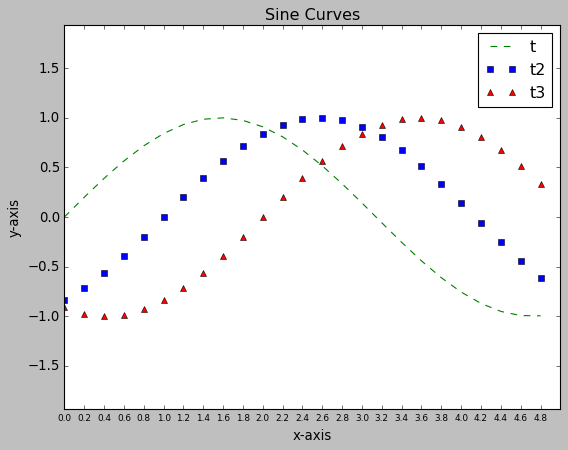

In [28]:
t = np.arange(0., 5., 0.2);
plt.plot(t,np.sin(t),color='green',linestyle='dashed',label='t');
plt.plot(t,np.sin(t - 1),'s',color='blue',label='t2');
plt.plot(t,np.sin(t - 2),'^',color='red',label='t3');
plt.axis('equal');
plt.xticks(t,fontsize=8);
plt.title("Sine Curves");
plt.xlabel("x-axis");
plt.ylabel("y-axis");
plt.legend(loc='upper right');

In [ ]:
2. Plot line1 and line2 with different styles: [4 points]
    # line 1
x1 = [10,20,30]
y1 = [20,40,10]

# line 2
x2 = [10,20,30]
y2 = [40,10,30]
(1) Set the x and y axes labels as 'x' and 'y'; 

(2) Plot lines and/or markers to the Axes: blue, red; dotted, dashed;

(3) Set a title: "Plot with two or more lines with different styles";

(4) Show a legend on the plot as 'line1-dotted', 'line2-dashed'.

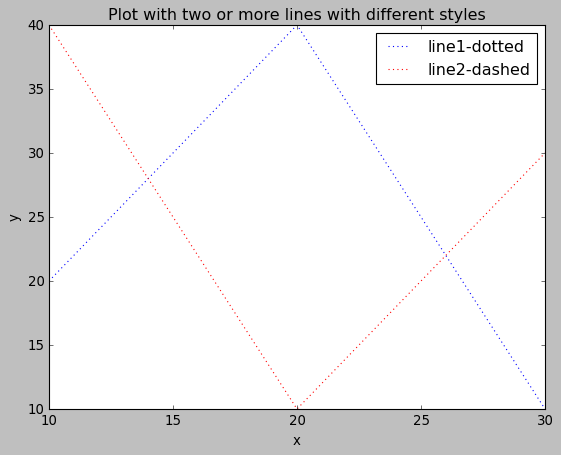

In [29]:
x1 = [10,20,30];
y1 = [20,40,10];
x2 = [10,20,30];
y2 = [40,10,30];
plt.plot(x1,y1,color='blue',linestyle='dotted',label='line1-dotted');
plt.plot(x2,y2,color='red',linestyle='dotted',label='line2-dashed');
plt.title("Plot with two or more lines with different styles");
plt.xlabel("x");
plt.ylabel("y");
plt.legend(loc='upper right');

In [ ]:
3. Draw a scatter plot with empty circles taking a 50-point random distribution in X and Y; set X and Y as x- and y- axes lables; 
any color for face and edge, and plotted against each other. [2 points]

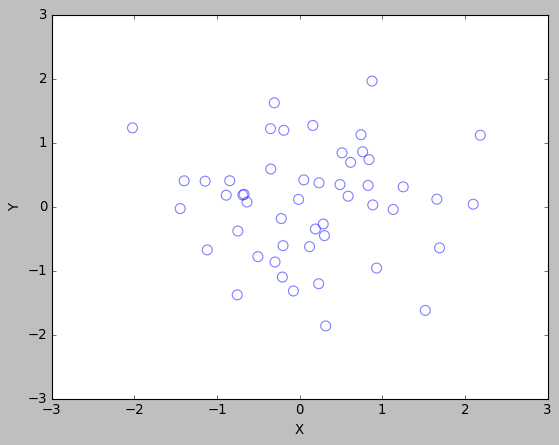

In [30]:
x = np.random.randn(50);
y = np.random.randn(50);
plt.scatter(x, y, s=80, facecolors='none', edgecolors='blue',alpha=0.5);
plt.xlabel("X");
plt.ylabel("Y");

In [ ]:
4. Create the following bar plot from the DataFrame. [4 points]

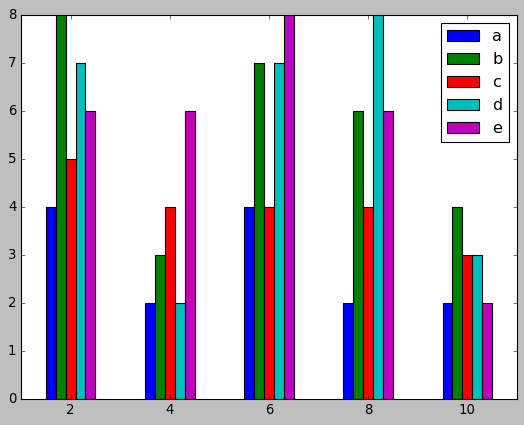

In [31]:
df = pd.DataFrame(np.array([4,8,5,7,6,2,3,4,2,6,4,7,4,7,8,2,6,4,8,6,2,4,3,3,2]).reshape(5,5),
             columns=['a','b','c','d','e'],
             index=[2,4,6,8,10]);
df.plot.bar(rot=0);
plt.show();

In [ ]:
5. The following dataset for average monthly precipitation. [6 points]

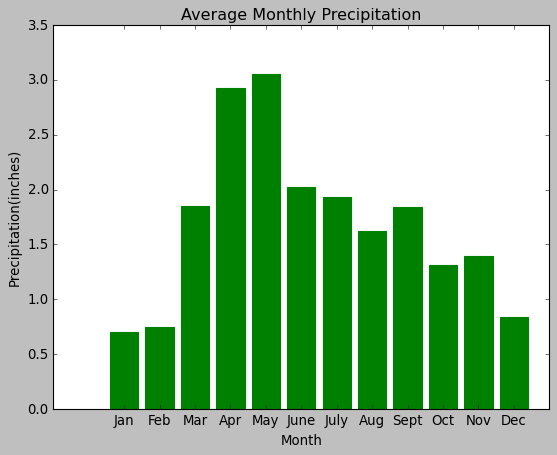

In [32]:
x = np.array(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']);
y = [0.70,0.75,1.85,2.93,3.05,2.02,1.93,1.62,1.84,1.31,1.39,0.84];
plt.bar(range(len(y)), y, fc='g',ec='g', tick_label=x);
plt.xlabel("Month");
plt.ylabel("Precipitation(inches)");
plt.title("Average Monthly Precipitation");